# Setup

Package imports:

In [34]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

Define a function that simulates a single death roll game between two players:

In [35]:
def death_roll(initial_upper):
    """
    A function that simulates a single death roll game between two players.
    :params: initial_upper is the upper-bound of the first roll.
    :returns: An array containing the winner, and the number of rounds/rolls.
    """

    # Player 1 goes first
    current_player = 1
    current_roll = initial_upper
    num_rolls = 0

    while True:
        # Roll 1-current_roll
        current_roll = randint(1,current_roll)

        # Incrememnt the number of rolls
        num_rolls += 1
    
        # Break if player rolls a 1
        if current_roll == 1:
            break
    
        # Next players turn
        if current_player == 1:
            current_player = 2
        elif current_player == 2:
            current_player = 1

    # Declare winner as the opposite of the player that rolled 1
    if current_player == 1:
        winner = 2
    elif current_player == 2:
        winner = 1

    # Return array containing the winner and the number of rolls/rounds
    return [winner, num_rolls]

Now we want to try and simulate a very large amount of games such as $ n = 1,000,000$ and investigate the distribution of the number of rolls for each game as we simulate more games. (the closer to $n \rightarrow \infty$ we get, the better the results follow a normal distribution in theory)

In [36]:
def simulate_death_roll(initial_upper, n, plot_rolls, plot_winners):
    """
    A function that simulates and plots the results of n games of deathroll with an initial roll upper bound of initial_upper.
    :params: initial_upper: The upperbound of the first roll, n: the number of games to simulate, 
             plot_rolls: boolean to plot rolls, plot_winners: boolean to plot winners
    :returns: None
    """
    
    # Initialise empty arrays to store results of each death roll game
    winners = []
    total_rolls = []    

    # Loop n times
    for _ in range(n):
        
        # Run a deathroll game
        current_game = death_roll(initial_upper)

        # Append the winner of the deathroll to the winners array
        winners.append(current_game[0])
        # Append the number of rounds/rolls to the total_rolls array
        total_rolls.append(current_game[1])

    # Plot total_rolls
    if plot_rolls == True:
        fig, ax = plt.subplots()
        labels, counts = np.unique(total_rolls, return_counts=True)
        vbars = ax.bar(labels, counts, align='center')
        ax.set_xticks(labels)
        ax.set_xlabel("Number of Rolls/Rounds")
        ax.set_ylabel("Number of Games")
        ax.set_title("Histogram of a Simulation of n = " + str(n) + ", 1-" + str(initial_upper) + " Death Roll Games")
        fig.set_size_inches(9.25, 5.25)
        ax.text(0.5,-0.15, "μ = " + str(round(np.mean(total_rolls), 2)) + ", σ = " + str(round(np.std(total_rolls), 2)), size=10, ha="center", transform=ax.transAxes)
        plt.show()
        plt.savefig("plot_rolls_" + str(initial_upper) + "_" + str(n) + ".png")
    

    # Plot winners
    if plot_winners == True:
        fig, ax = plt.subplots()
        labels, counts = np.unique(winners, return_counts=True)
        vbars = ax.bar(labels, counts, align='center')
        ax.set_xticks(labels)
        ax.set_xlabel("Player")
        ax.set_ylabel("Number of Wins")
        ax.set_title("Histogram of a Simulation of n = " + str(n) + ", 1-" + str(initial_upper) + " Death Roll Games")
        ax.bar_label(vbars, fmt='%.2f')
        plt.show()

# Simulations

Simulations with an initial upper limite of 100 (1-100 first roll):

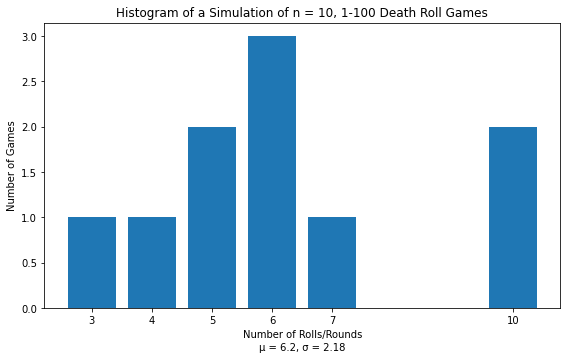

In [37]:
simulate_death_roll(100, 10, True, False)

Simulations with an initial upper limit of 9999 (1-9999 first roll):

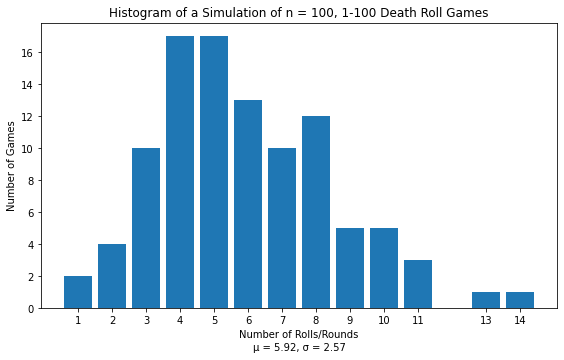

In [38]:
simulate_death_roll(100, 100, True, False)

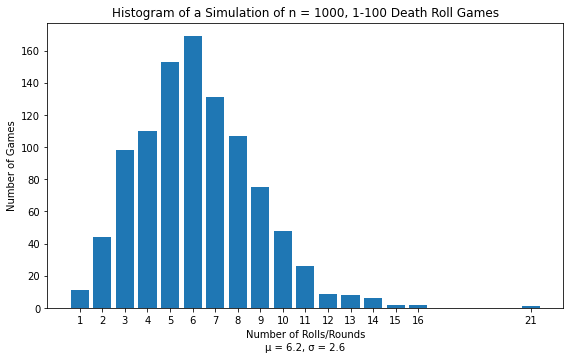

In [39]:
simulate_death_roll(100, 1000, True, False)

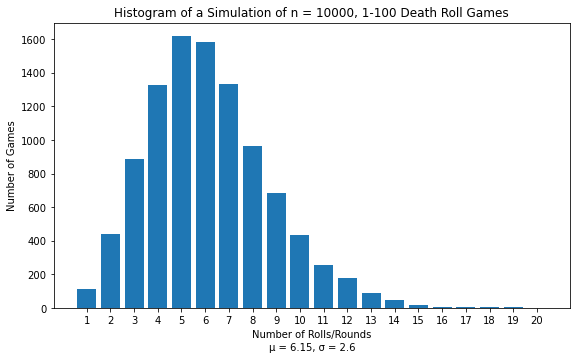

In [40]:
simulate_death_roll(100, 10000, True, False)

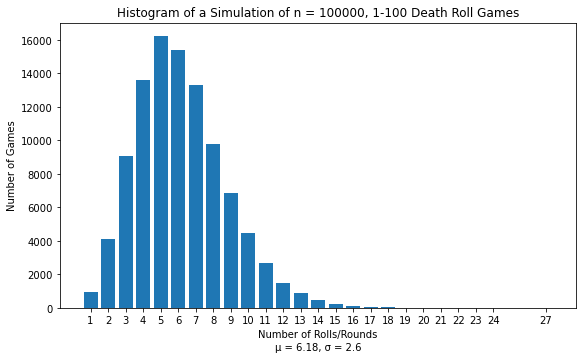

In [41]:
simulate_death_roll(100, 100000, True, False)

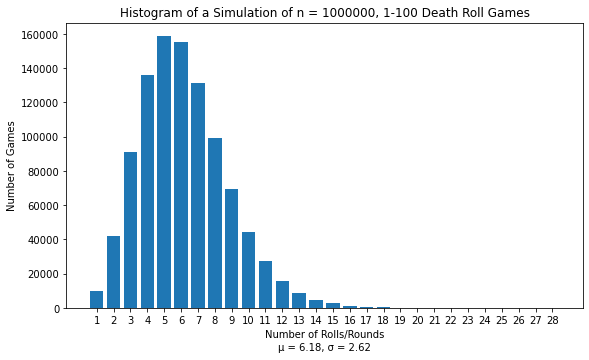

In [42]:
simulate_death_roll(100, 1000000, True, False)

Simulations with an initial upper limit of 9999 (1-9999 first roll):

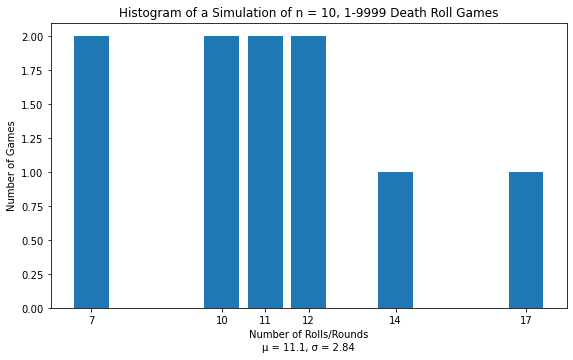

In [43]:
simulate_death_roll(9999, 10, True, False)

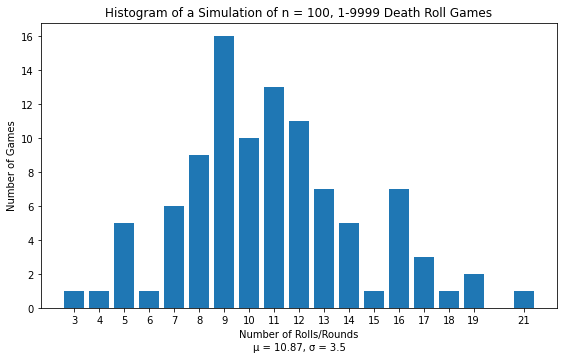

In [44]:
simulate_death_roll(9999, 100, True, False)

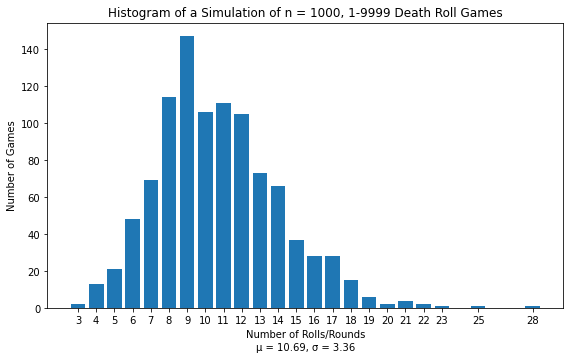

In [45]:
simulate_death_roll(9999, 1000, True, False)

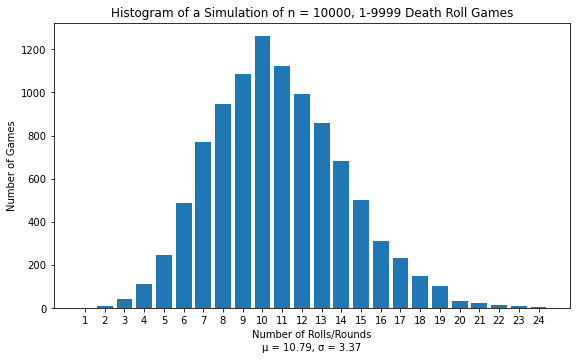

In [46]:
simulate_death_roll(9999, 10000, True, False)

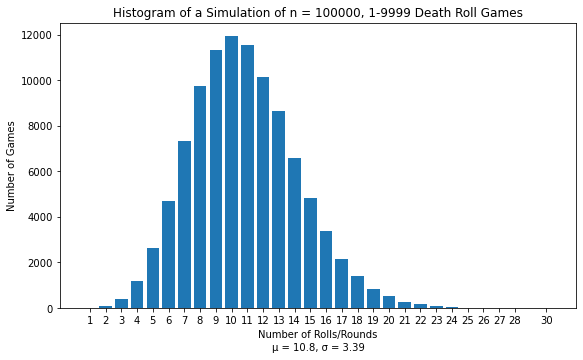

In [47]:
simulate_death_roll(9999, 100000, True, False)

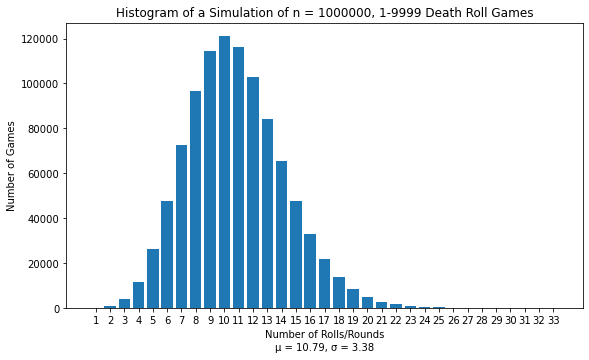

In [48]:
simulate_death_roll(9999, 1000000, True, False)

In both cases, you can clearly see that as we simulate more and more death roll games, that the distribution of the Number of Rolls/Rounds per game forms a Normal Distribution with mean $\mu$ and standard deviation $\sigma$ approaching certain values.